In [1]:
import logging
import numpy as np  
from gensim.models import Doc2Vec
import os
import codecs

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [2]:
dbow = Doc2Vec.load("/home/laampt/nlp/xnews/model_crazy/crazy_dbow_5ns_100features_2mw_r10")

In [3]:
pos_posts = []
pos_num = 5090
pos_tags = []
for i in range(pos_num):
    v_b = dbow.docvecs["vc_{}".format(i)]
    pos_tags.append("vc_{}".format(i))
    if v_b.shape[0] == 100: 
        pos_posts.append(v_b)
    else:
        pass
    
for i in range(1086):
    v_b = dbow.docvecs["vca_{}".format(i)]
    pos_tags.append("vca_{}".format(i))
    if v_b.shape[0] == 100: 
        pos_posts.append(v_b)
    else:
        pass

print len(pos_posts), len(pos_tags)

6176 6176


In [4]:
neg_posts = []
neg_tags = []

for i in np.random.randint(0,74656,200):
    v_b = dbow.docvecs["vietnamnet_{}".format(i)]
    neg_tags.append("vietnamnet_{}".format(i))
    if v_b.shape[0] == 100: 
        neg_posts.append(v_b)
    else:
        pass

for i in np.random.randint(0,69061,200):
    v_b = dbow.docvecs["vneconomy_{}".format(i)]
    neg_tags.append("vneconomy_{}".format(i))
    if v_b.shape[0] == 100: 
        neg_posts.append(v_b)
    else:
        pass
    
for i in np.random.randint(0,66518,2000):
    v_b = dbow.docvecs["tuoitre_{}".format(i)]
    neg_tags.append("tuoitre_{}".format(i))
    if v_b.shape[0] == 100: 
        neg_posts.append(v_b)
    else:
        pass

for i in np.random.randint(0,518279,2000):
    v_b = dbow.docvecs["dantri_{}".format(i)]
    neg_tags.append("dantri_{}".format(i))
    if v_b.shape[0] == 100: 
        neg_posts.append(v_b)
    else:
        pass
    
for i in np.random.randint(0,109594,200):
    v_b = dbow.docvecs["sggp_{}".format(i)]
    neg_tags.append("sggp_{}".format(i))
    if v_b.shape[0] == 100: 
        neg_posts.append(v_b)
    else:
        pass
    
for i in np.random.randint(0,31306,200):
    v_b = dbow.docvecs["baolaichau_{}".format(i)]
    neg_tags.append("baolaichau_{}".format(i))
    if v_b.shape[0] == 100: 
        neg_posts.append(v_b)
    else:
        pass

for i in np.random.randint(0,25880,200):
    v_b = dbow.docvecs["baonamdinh_{}".format(i)]
    neg_tags.append("baonamdinh_{}".format(i))
    if v_b.shape[0] == 100: 
        neg_posts.append(v_b)
    else:
        pass
    
for i in np.random.randint(0,52974,200):
    v_b = dbow.docvecs["genk_{}".format(i)]
    neg_tags.append("genk_{}".format(i))
    if v_b.shape[0] == 100: 
        neg_posts.append(v_b)
    else:
        pass

for i in np.random.randint(0,11584,200):
    v_b = dbow.docvecs["thanhnienviet_{}".format(i)]
    neg_tags.append("thanhnienviet_{}".format(i))
    if v_b.shape[0] == 100: 
        neg_posts.append(v_b)
    else:
        pass

for i in np.random.randint(0,10745,200):
    v_b = dbow.docvecs["suckhoe_{}".format(i)]
    neg_tags.append("suckhoe_{}".format(i))
    if v_b.shape[0] == 100: 
        neg_posts.append(v_b)
    else:
        pass
    
for i in np.random.randint(0,17414,200):
    v_b = dbow.docvecs["thoidai_{}".format(i)]
    neg_tags.append("thoidai_{}".format(i))
    if v_b.shape[0] == 100: 
        neg_posts.append(v_b)
    else:
        pass
    
print len(neg_posts), len(neg_tags)

5800 5800


In [5]:
X = neg_posts + pos_posts
y = [0] * len(neg_posts) + [1]* len(pos_posts)
tags= neg_tags + pos_tags

print len(X), len(y), len(tags)

11976 11976 11976


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use("ggplot")

/home/laampt/ds/local/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [7]:
df = pd.DataFrame(dict(tags=tags, labels=y))

In [8]:
df.head()

,labels,tags
0,0,vietnamnet_52366
1,0,vietnamnet_70461
2,0,vietnamnet_13017
3,0,vietnamnet_6983
4,0,vietnamnet_32215


In [ ]:
print dist_vs.shape
print dist_vs[0,0]
print dist_vs[0,1]

In [9]:
%reset_selective dbow

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Random 1K projection

In [11]:
from tsne import tsne
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
idx = np.random.randint(0, 11976, 1000)

X_1k = [X[i] for i in idx]
y_1k = [y[i] for i in idx]
tag_1k = [tags[i] for i in idx]

dist_vs = 1 - cosine_similarity(X_1k)
tsnemat = tsne(np.asfarray(dist_vs))

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  1000 ...
Computing P-values for point  500  of  1000 ...
Mean value of sigma:  1.216453065
Iteration  10 : error is  15.6963215156
Iteration  20 : error is  14.6067804792
Iteration  30 : error is  14.3353788831
Iteration  40 : error is  14.2206820437
Iteration  50 : error is  14.2932929011
Iteration  60 : error is  14.291104797
Iteration  70 : error is  14.291686742
Iteration  80 : error is  14.2869027927
Iteration  90 : error is  14.2866956094
Iteration  100 : error is  14.2875141262
Iteration  110 : error is  1.7919264105
Iteration  120 : error is  1.39908714367
Iteration  130 : error is  1.2532518875
Iteration  140 : error is  1.17971583471
Iteration  150 : error is  1.13106000482
Iteration  160 : error is  1.09613307754
Iteration  170 : error is  1.06917041975
Iteration  180 : error is  1.04832159286
Iteration  190 : error is  1.03175910649
Iteration  200 : error is  1.018331755

tsne.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  P[i, Math.concatenate((Math.r_[0:i], Math.r_[i+1:n]))] = thisP;


In [16]:
df = pd.DataFrame(dict(tags=tag_1k, classes=y_1k))
df['x2'] = tsnemat[:,0]
df['y2'] = tsnemat[:,1]

df.head()

,classes,tags,x2,y2
0,0,vietnamnet_7020,-6.206487,3.678920
1,0,baonamdinh_12737,-39.527582,8.563184
2,1,vc_3342,55.192393,-30.365192
3,1,vc_1675,49.413987,-2.534106
4,1,vc_3374,27.135814,13.408005


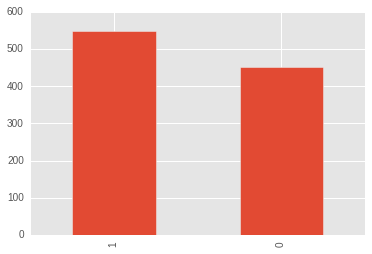

In [17]:
p = df.classes.value_counts().plot(kind='bar')

In [34]:
import itertools

#set up colors per clusters using a dict
colors = ['#' + ii.strip() for ii in '348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2'.split(',')]
colors += [ii.strip() for ii in '#30a2da, #fc4f30, #e5ae38, #6d904f, #8b8b8b'.split(',')]
colors = itertools.cycle(colors)
class_names = ['good', 'bad']

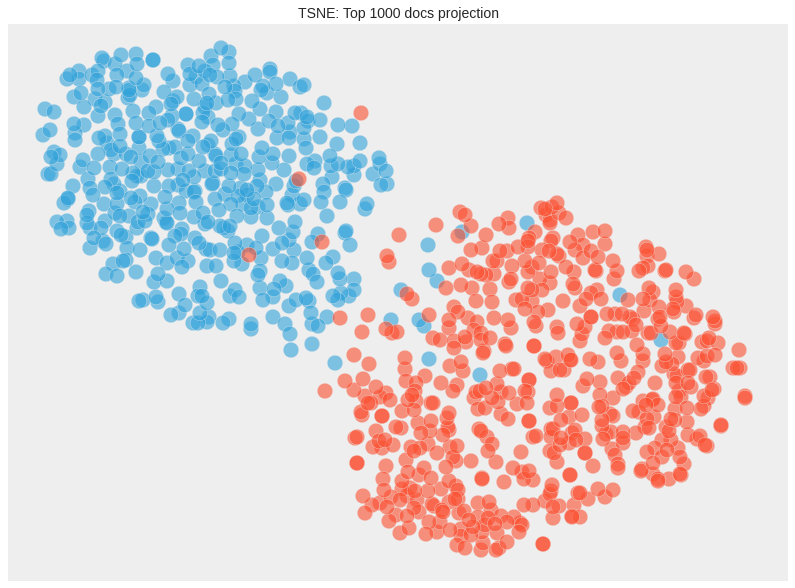

In [74]:
import mpld3

fig, ax = plt.subplots(figsize=(14,10), subplot_kw=dict(axisbg='#EEEEEE'))

elements = []
for label in range(2):
    scatter = ax.scatter(df[df.classes==label]['x2'].values,
                         df[df.classes==label]['y2'].values,
                         c=next(colors),
                         s=240,
                         label=label,
                         alpha=0.6,
                         cmap=plt.cm.get_cmap('rainbow', 10))
    

    labels = list(df[df.classes==label]['tags'].values)
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    elements.append([scatter])
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

# adding legend
labels = [u"{}: {}".format(i, class_names[i]) for i in range(2)]
mpld3.plugins.connect(fig, mpld3.plugins.InteractiveLegendPlugin(elements, labels))

ax.grid(color='white', linestyle='')
ax.set_title(u"TSNE: Top 1000 docs projection", size=14) 
# mpld3.display() #show the plot

In [69]:
from IPython.core.display import HTML
def css_styling():
    styles = """<style> .container { width:75% !important; } </style>"""
    return HTML(styles)
css_styling()

In [64]:
from IPython.display import HTML
mpld3.enable_notebook()

html = mpld3.fig_to_html(fig)
HTML(html)

## Final run

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  1000 ...
Computing P-values for point  500  of  1000 ...
Mean value of sigma:  1.21266017178
Iteration  10 : error is  15.5276285393
Iteration  20 : error is  14.6636542456
Iteration  30 : error is  14.3851771801
Iteration  40 : error is  14.3745265841
Iteration  50 : error is  14.3987501378
Iteration  60 : error is  14.4091264011
Iteration  70 : error is  14.4134007477
Iteration  80 : error is  14.4084876172
Iteration  90 : error is  14.4114946113
Iteration  100 : error is  14.4085776352
Iteration  110 : error is  1.85455750454
Iteration  120 : error is  1.50724207637
Iteration  130 : error is  1.35662746137
Iteration  140 : error is  1.27524605293
Iteration  150 : error is  1.22301908985
Iteration  160 : error is  1.18597234047
Iteration  170 : error is  1.15789183398
Iteration  180 : error is  1.13502061114
Iteration  190 : error is  1.11697914536
Iteration  200 : error is  1.102

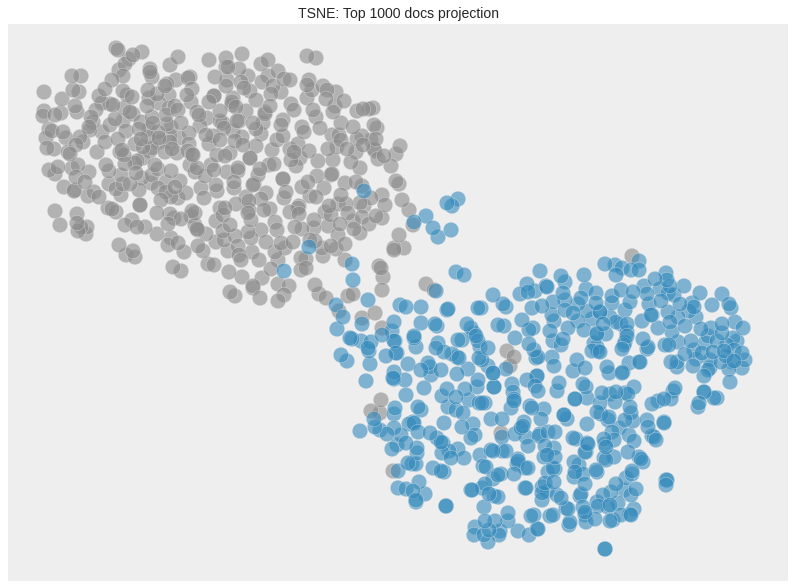

In [77]:
idx = np.random.randint(0, 11976, 1000)

X_1k = [X[i] for i in idx]
y_1k = [y[i] for i in idx]
tag_1k = [tags[i] for i in idx]

dist_vs = 1 - cosine_similarity(X_1k)
tsnemat = tsne(np.asfarray(dist_vs))
df = pd.DataFrame(dict(tags=tag_1k, classes=y_1k))
df['x2'] = tsnemat[:,0]
df['y2'] = tsnemat[:,1]

fig, ax = plt.subplots(figsize=(14,10), subplot_kw=dict(axisbg='#EEEEEE'))

elements = []
for label in range(2):
    scatter = ax.scatter(df[df.classes==label]['x2'].values,
                         df[df.classes==label]['y2'].values,
                         c=next(colors),
                         s=240,
                         label=label,
                         alpha=0.6,
                         cmap=plt.cm.get_cmap('rainbow', 10))
    

    labels = list(df[df.classes==label]['tags'].values)
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    elements.append([scatter])
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

# adding legend
labels = [u"{}: {}".format(i, class_names[i]) for i in range(2)]
mpld3.plugins.connect(fig, mpld3.plugins.InteractiveLegendPlugin(elements, labels))

ax.grid(color='white', linestyle='')
ax.set_title(u"TSNE: Top 1000 docs projection", size=14) 
# mpld3.display() #show the plot

In [78]:
html = mpld3.fig_to_html(fig)
HTML(html)